In [1]:
import numpy as np
import numpy.ma as ma
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
from matplotlib import gridspec

import sys
sys.path.append('/scratch9/mkron/software/DeepIceLearning/Plots')
import plot_functions_mk as pfmk

In [2]:
DATA_DIR = "/scratch9/mkron/data/NN_out/run66/"
predictions_mctrue = pickle.load(file(os.path.join(DATA_DIR, 'prediction.pickle')))
epochs_acc_loss = np.delete(np.genfromtxt(os.path.join(DATA_DIR, "loss_logger.csv"), delimiter=','), 0, axis=0).T

###### Allocation of variables

In [3]:
#Target 1
acc_train_1 = epochs_acc_loss[1]
loss_train_1 = epochs_acc_loss[2]
acc_val_1 = epochs_acc_loss[10]
loss_val_1 = epochs_acc_loss[11]
pred_label_1 = predictions_mctrue["prediction"][0] #list with probability for each class
true_label_1 = predictions_mctrue["mc_truth"]["ClassificationLabel_truth"][:len(pred_label_1)]-1


#Target 2
acc_train_2 = epochs_acc_loss[3]
loss_train_2 = epochs_acc_loss[4]
acc_val_2 = epochs_acc_loss[12]
loss_val_2 = epochs_acc_loss[13]
pred_label_2 = predictions_mctrue["prediction"][1] #list with probability for each class
true_label_2 = predictions_mctrue["mc_truth"]["StartingLabel_truth"][:len(pred_label_2)]


#Target 3
acc_train_3 = epochs_acc_loss[5]
loss_train_3 = epochs_acc_loss[6]
acc_val_3 = epochs_acc_loss[14]
loss_val_3 = epochs_acc_loss[15]
pred_label_3 = predictions_mctrue["prediction"][2] #list with probability for each class
true_label_3 = predictions_mctrue["mc_truth"]["CoincidenceLabel_truth"][:len(pred_label_3)]


#Target 4
acc_train_4 = epochs_acc_loss[7]
loss_train_4 = epochs_acc_loss[8]
acc_val_4 = epochs_acc_loss[16]
loss_val_4 = epochs_acc_loss[17]
pred_label_4 = predictions_mctrue["prediction"][3] #list with probability for each class
true_label_4 = predictions_mctrue["mc_truth"]["UpDownLabel_truth"][:len(pred_label_4)]

#Energy
energy=[]
for i in xrange(0, len(pred_label_4)):
    energy.append(predictions_mctrue["reco_vals"][i][0])
energy = abs(np.array(energy))

## Acc and Loss for different Targets

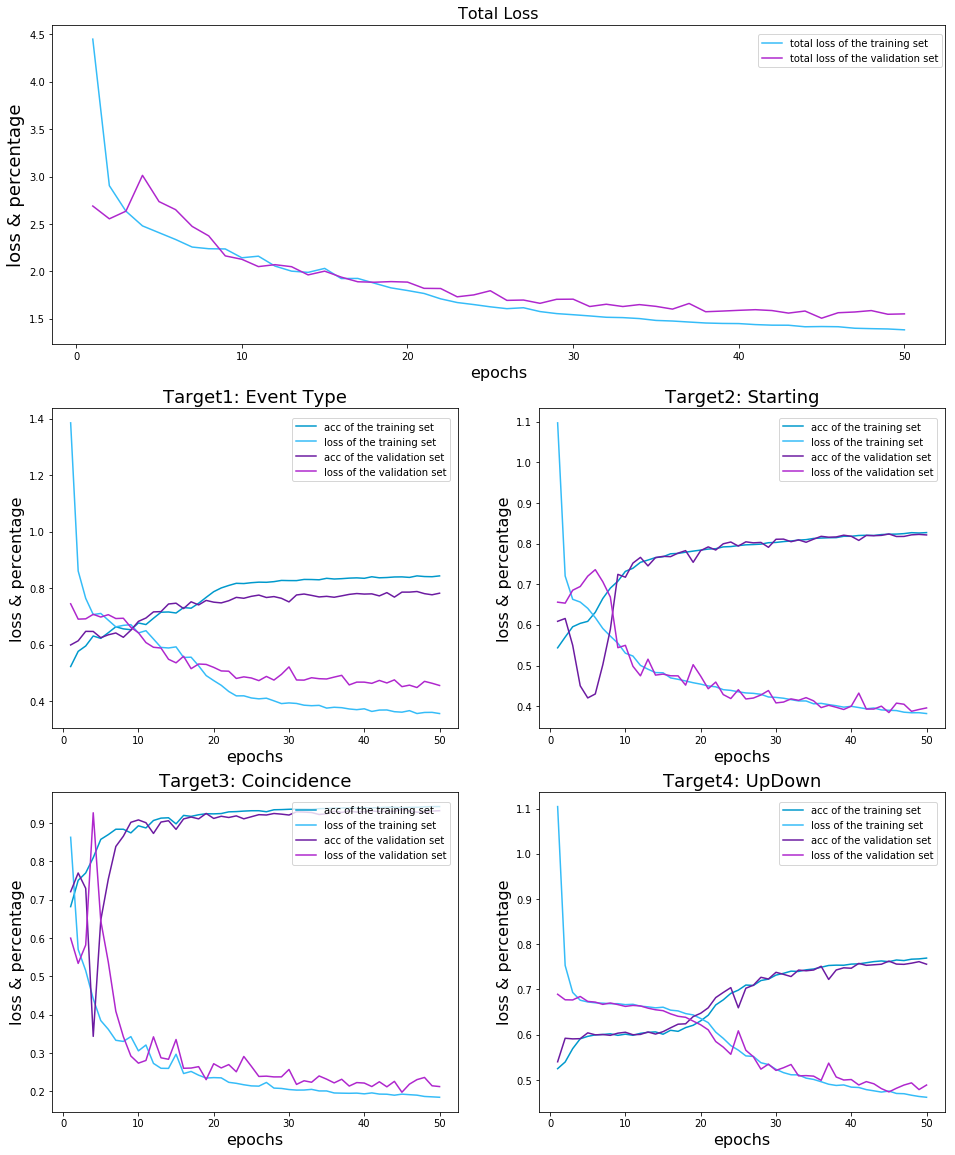

In [4]:
fig = plt.figure(figsize=(16,20))

ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
x = np.linspace(1, len(epochs_acc_loss[0]), num=len(epochs_acc_loss[0]), endpoint=True)
ax0.plot(x, epochs_acc_loss[9], color="#35bcf8", label="total loss of the training set")
ax0.plot(x, epochs_acc_loss[18], color='#af27cd', label="total loss of the validation set")
ax0.legend(bbox_to_anchor=(0.79, 0.97), loc=2, borderaxespad=0.)
ax0.set_ylabel('loss & percentage', fontsize=18)
ax0.set_xlabel("epochs", fontsize=16)
ax0.set_title("Total Loss", fontsize=16)

ax1 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
ax1 = pfmk.acc_loss_plot(acc_train_1, loss_train_1, acc_val_1, loss_val_1, "Target1: Event Type")

ax2 = plt.subplot2grid((3, 2), (1, 1), colspan=1)
ax2 = pfmk.acc_loss_plot(acc_train_2, loss_train_2, acc_val_2, loss_val_2, "Target2: Starting")

ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
ax3 = pfmk.acc_loss_plot(acc_train_3, loss_train_3, acc_val_3, loss_val_3, "Target3: Coincidence")

ax4 = plt.subplot2grid((3, 2), (2, 1), colspan=1)
ax4 = pfmk.acc_loss_plot(acc_train_4, loss_train_4, acc_val_4, loss_val_4, "Target4: UpDown")

In [5]:
print "Acc on Validation Set of Target 1 Event Type : {}%".format(round(np.max(acc_val_1)*100 ,2))
print "Acc on Validation Set of Target 2 Starting   : {}%".format(round(np.max(acc_val_2)*100 ,2))
print "Acc on Validation Set of Target 3 Coincidence: {}%".format(round(np.max(acc_val_3)*100 ,2))
print "Acc on Validation Set of Target 3 UpDown     : {}%".format(round(np.max(acc_val_4)*100 ,2))

Acc on Validation Set of Target 1 Event Type : 78.84%
Acc on Validation Set of Target 2 Starting   : 82.37%
Acc on Validation Set of Target 3 Coincidence: 93.65%
Acc on Validation Set of Target 3 UpDown     : 76.27%


## Target 1 : Event Type

In [6]:
pred_for_class1 = pred_label_1[true_label_1 == 0]
E_for_class1 = energy[true_label_1 == 0]
pred_for_class2 = pred_label_1[true_label_1 == 1]
E_for_class2 = energy[true_label_1 == 1]
pred_for_class3 = pred_label_1[true_label_1 == 2]
E_for_class3 = energy[true_label_1 == 2]

classes = ("Cascade", "Track", "Double Bang")
absolute, xe,ye = np.histogram2d(np.argmax(pred_label_1, axis=1), true_label_1, bins=(len(classes),len(classes)))
# that means that the prediction has to correspond to a event type 
res_true = absolute/np.sum(absolute,axis=0)
# normalization if the absolute values, so that the sum over PREDICTION is 1
# that means that a event hast to be predicted as one type 
res_pred = absolute/np.sum(absolute,axis=1).reshape(-1,1)

/scratch9/mkron/software/DeepIceLearning/Plots/plot_functions_mk.py:67: RuntimeWarning: invalid value encountered in divide
  acc = 1.*valsTrue/valsAll


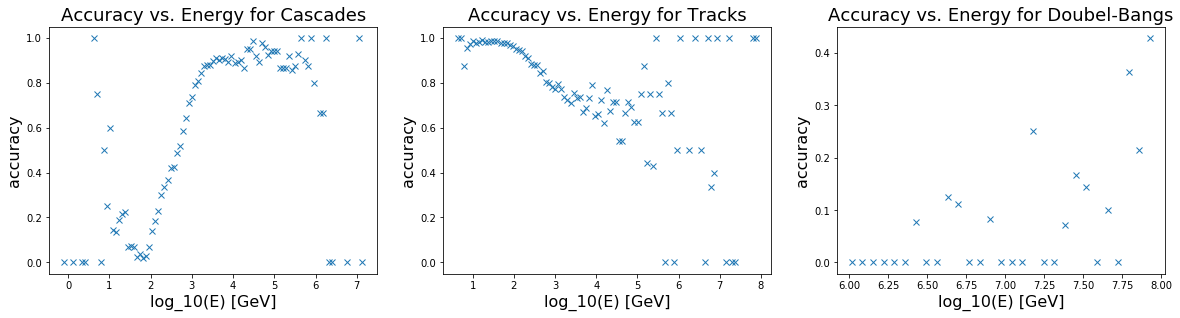

In [7]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax1 = pfmk.acc_vs_energy_plot(pred_for_class1, 0, E_for_class1, "Accuracy vs. Energy for Cascades", 100)

ax2 = plt.subplot2grid((2, 3), (0, 1))
ax2 = pfmk.acc_vs_energy_plot(pred_for_class2, 1, E_for_class2, "Accuracy vs. Energy for Tracks", 100)

ax3 = plt.subplot2grid((2, 3), (0, 2))
ax3 = pfmk.acc_vs_energy_plot(pred_for_class3, 2, E_for_class3, "Accuracy vs. Energy for Doubel-Bangs", 30)


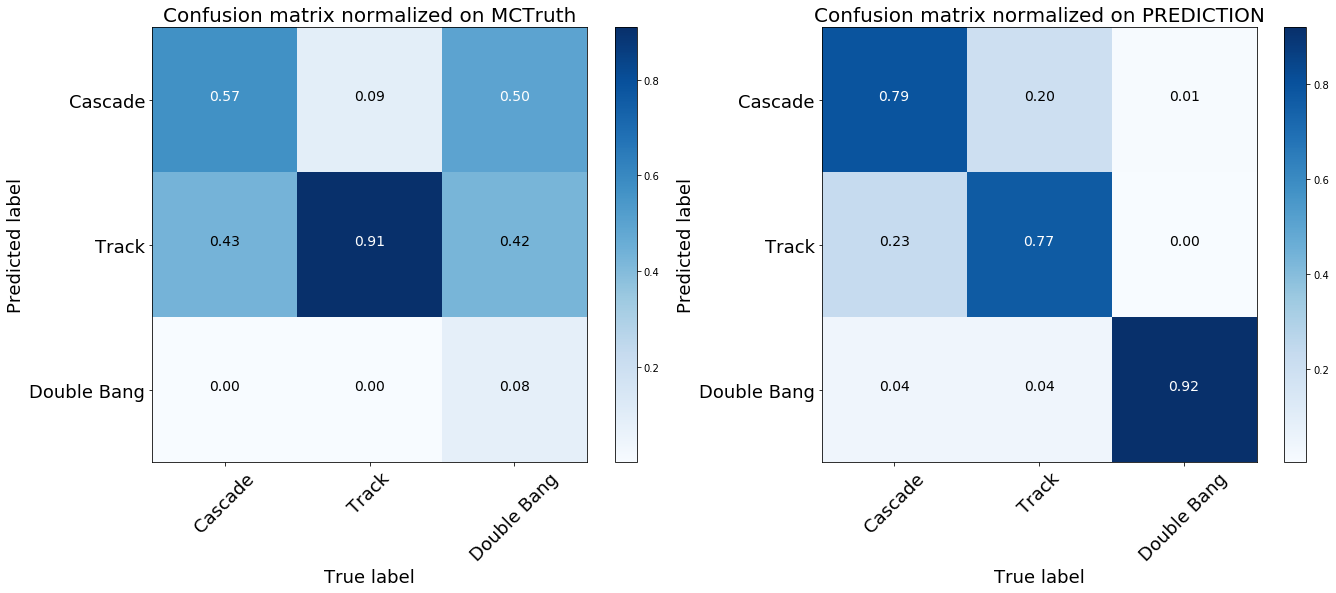

In [8]:
fig = plt.figure(figsize=(22, 8))

ax1 = plt.subplot2grid((1, 2), (0, 0))
pfmk.plot_confusion_matrix(res_true, classes=classes, title='Confusion matrix normalized on MCTruth')

ax2 = plt.subplot2grid((1, 2), (0, 1))
pfmk.plot_confusion_matrix(res_pred, classes=classes, title='Confusion matrix normalized on PREDICTION')

## Target 2: Starting

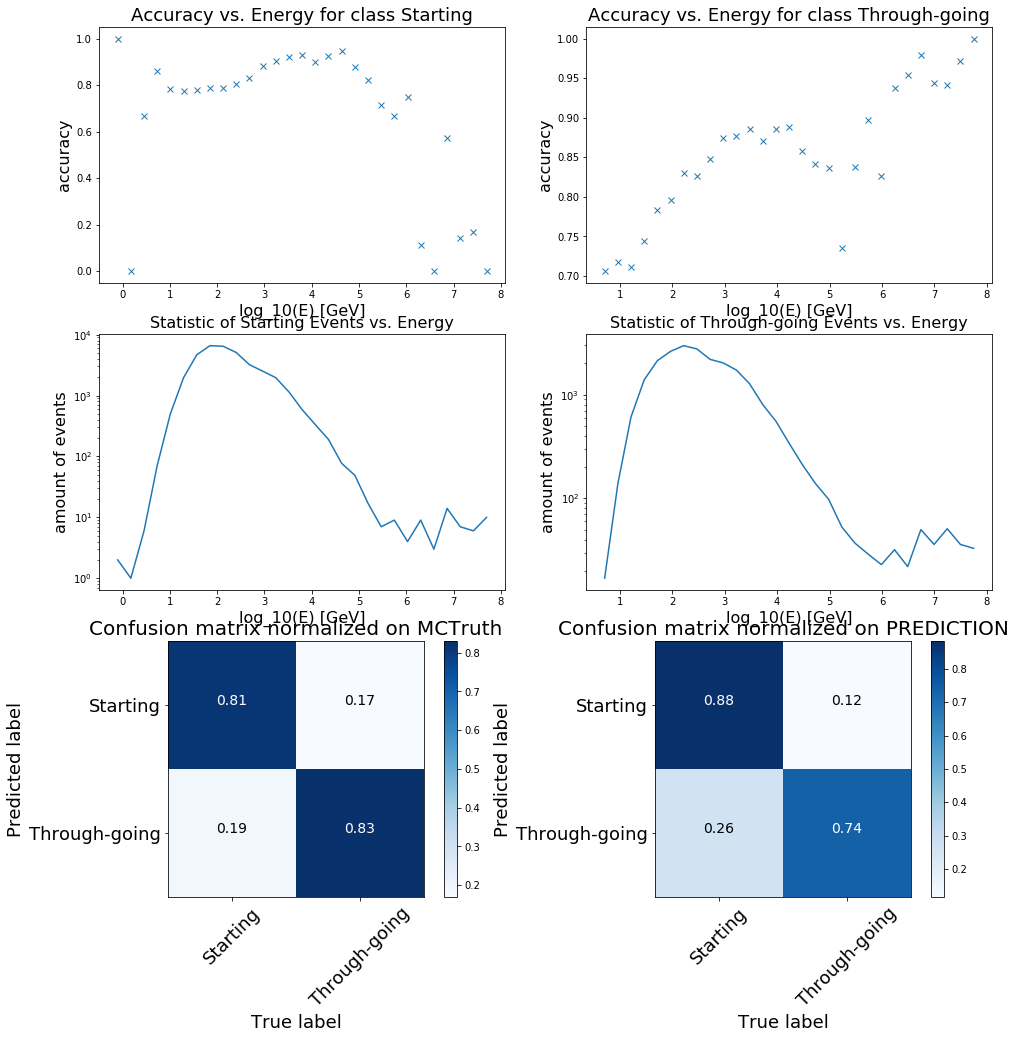

In [9]:
pfmk.summary_plot_binary_target(pred_label_2, true_label_2, ("Starting", "Through-going"), energy, 30)

## Target 3: Coinvidence

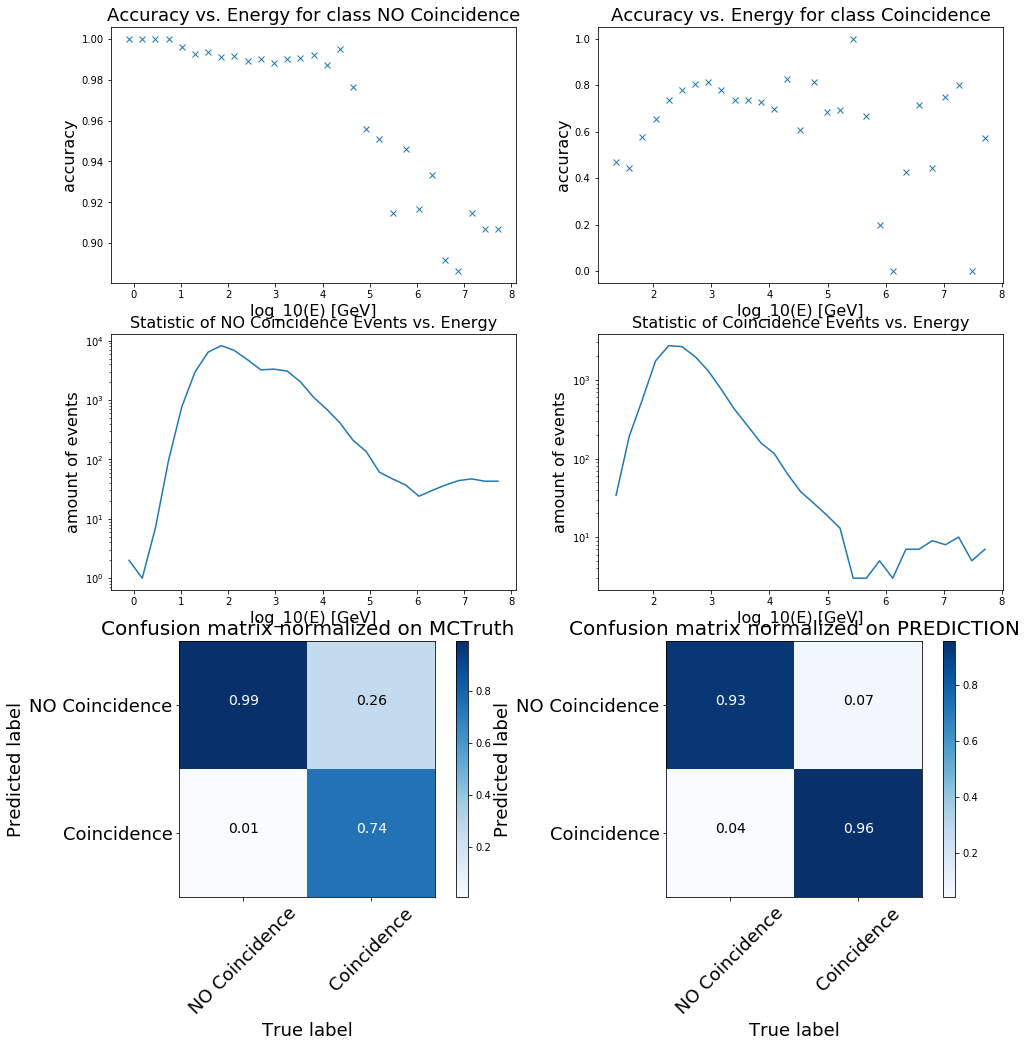

In [10]:
pfmk.summary_plot_binary_target(pred_label_3, true_label_3, ("NO Coincidence", "Coincidence"), energy, 30)

## Target 4: UpDown-going

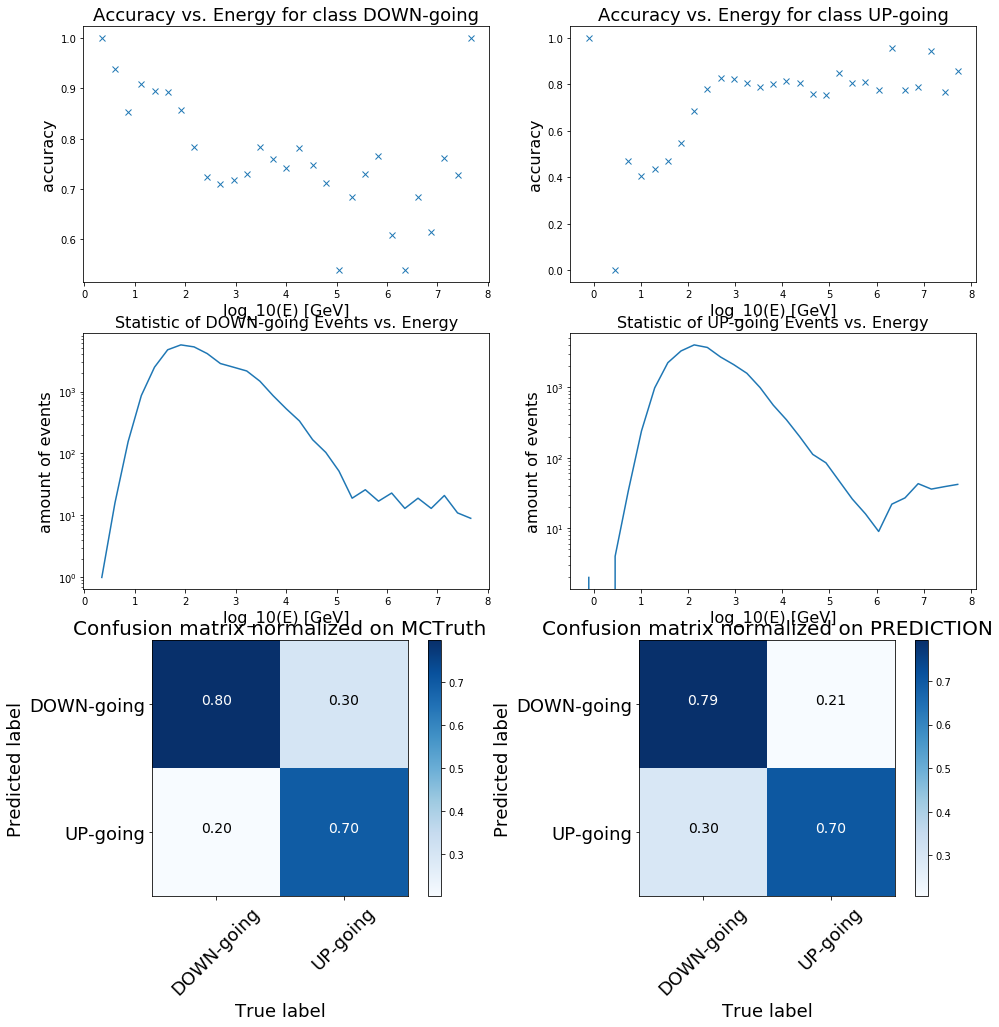

In [11]:
pfmk.summary_plot_binary_target(pred_label_4, true_label_4, ("DOWN-going", "UP-going"), energy, 30)

In [ ]:
# plot acc vs zenith
# zenith is implemented to be saved in reco_vals in the next hdf generation